# Link github: 
Bản quyền bài làm thuộc về các thành viên trong nhóm. Các hành vi sao chép và sử dụng phải được sự đồng ý của chủ sở hữu <br>
https://github.com/nightfury1103/P4DS-CQ19-FinalProject

# Import
Các thư viện cần thiết cho bài làm này

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
pd.set_option('display.max_columns', None)  

Điều chỉnh kích thước và độ phóng chung cho các biểu đồ: **figsize = (10,5) ; dpi = 80**

In [2]:
plt.rcParams['figure.figsize'] = [10, 5]
plt.rcParams['figure.dpi'] = 80

# Thu thập dữ liệu

## Dữ liệu của bạn là về chủ đề gì 

- Hiện nay, việc **cho thuê xe đạp công cộng** đang trở nên phổ biến ở nước ta và đang có sức hấp dẫn rất lớn. Một trong những điều quan trọng trong kế hoạch đã và đang sắp được triển khai này là chất lượng dịch vụ. Bao gồm những thứ như số xe đạp có thể thuê, thời gian chờ để thuê một chiếc xe đạp,...Sau cùng, việc cung cấp xe đạp cho một thành phố cũng còn rất nhiều vấn đề cần lo lắng. 
- Phần quan trọng mà chúng em muốn dự đoán trong đồ án này đó là số lượng xe yêu cầu vào mỗi giờ qua đó có thể cung cấp xe đạp một cách ổn định mà ai ai cũng có thể thuê một chiếc xe đạp cho mình bằng cách đơn giản nhất. Mặc dù vậy, do nước ta mới chỉ đang ở hình thức thí điểm nên không thể có dữ liệu được. Do đó, xem như một biện pháp thay thế khá hữu hiệu, chúng em đã lựa chọn dữ liệu từ **thành phố Seoul, thủ đô Hàn Quốc**, một trong những thành phố phát triển bậc nhất ở Châu Á và cũng khá gần gũi với Việt Nam chúng ta.

## Mục đích lựa chọn dữ liệu này.


- Với một thành phố nhộn nhịp, phát triển như thành phố Hồ Chí Minh thì việc cảm thấy khó chịu, không thoải mái khi mà khẩu trang đã trở thành vật bất ly thân khi đi học, đi làm, thậm chí ngay cả những lúc đi chơi. Những buổi sáng thức giấc không còn mở cửa sổ để hít thở không khí trong lành để tận hưởng một ngày mới. Thay vào đó là một Hồ Chí Minh với đầy ấp tiếng ồn, bụi bặm và khói bụi thông báo cho chúng ta biết mình đang ở một thành phố sầm uất nhất nhì Việt Nam.
- Với suy nghĩ như vậy, em rất ủng hộ việc sử dụng **xe đạp công cộng** để giúp phần nào giảm thiểu được số lượng tham gia của các phương tiện giao thông ô nhiễm và đầy rẫy ồn ào. Việc sử dụng xe đạp công cộng là một trong những cách giúp chung tay bảo vệ môi trường cùng thế giới. Đó là lý do chính mà chúng em lựa chọn đề tài này. Hy vọng sẽ mang đến một vài điều thú vị cho thầy và các bạn!

## Nguồn dữ liệu - Quyền sử dụng

- Dữ liệu sử dụng của đồ án này được public trên trang web **UCI (trang web cung cấp dữ liệu nổi tiếng cho học máy và trí tuệ nhân tạo)** với đường dẫn sau: [link](https://archive.ics.uci.edu/ml/datasets/Seoul+Bike+Sharing+Demand).
- Về vấn đề quyền sử dụng: Tác giả đề cập đến vấn đề quyền sử dụng dựa theo [Điều luật của dữ liệu thành phố Seoul](https://data.seoul.go.kr/etc/accessTerms.do) <br>

**Lưu ý: Vì đây là dữ liệu liên quan đến một thành phố nên việc sử dụng dữ liệu phải thật thận trọng và dựa trên điều luật về dữ liệu của thành phố Seoul, Hàn Quốc ban hành. Do đó, mọi hành vi liên quan đến dữ liệu hay vấn đề bản quyền đều không phải trách nhiệm của tác giả. Cân nhắc trước khi sử dụng!**

## Người ta thu thập dữ liệu như thế nào?

- Là thủ đô và cũng là thành phố sầm uất nhất của Hàn Quốc. Không lạ gì khi Seoul là một trong các thành phố dẫn đầu về công nghệ. Do đó, đối với họ việc thu thập dữ liệu cũng trở nên dễ dàng hơn bao giờ hết khi `dữ liệu về xe đạp` hay các dữ liệu bao gồm các dữ liệu như **`thời tiết` (nhiệt độ, độ ẩm, sức gió, tầm nhìn xa, độ điểm sương, bức xạ mặt trời, lượng tuyết, lượng mưa)** đều được đo chuẩn xác bằng các thiết bị công nghệ như GPS, đài khí tượng,...Ngoài ra một số thông số còn được lấy từ trang **[Korea Meteorological Administration](http://www.kma.go.kr/eng/index.jsp)**. Và đó cũng là cách thu thập dữ liệu mà tác giả đề cập ở phần mô tả. <br>
- Ngoài ra, thông tin về  `lịch nghỉ lễ ở Hàn Quốc` được lấy từ trang **[South Korea Public Holidays](https://publicholidays.co.kr/)**

## Mô tả dữ liệu

Như đã nói ở trên thì dữ liệu này nói đến `dự án xe đạp công cộng của thành phố Seoul, thủ đô Hàn Quốc`. Dữ liệu được thu thập theo từng giờ, **bắt đầu từ đầu tháng 12 năm 2017 đến cuối tháng 11 năm 2018** (vào khoảng một năm). Dữ liệu bao gồm ngày tháng, số lượng xe đạp cho thuê và những thông tin về thời tiết ngày giờ,... Thông qua việc tìm hiểu dữ liệu này. Hy vọng chúng ta có thể tìm ra và trả lời được những câu hỏi bổ ích. Cụ thể thế nào xin mời thầy và các bạn chúng ta cùng bước vào phần "Khám phá dữ liệu". 

# Khám phá dữ liệu

## Đọc dữ liệu

In [3]:
df = pd.read_csv('Data/SeoulBikeData.csv', encoding= 'unicode_escape')
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


## Dữ liệu có bao nhiêu dòng và cột ? 

In [4]:
n_rows, n_col = df.shape
n_rows, n_col

(8760, 14)

Như vậy ta có được dữ liệu hiện tại đưa vào là 8760 dòng và 14 cột.

## Các dòng dữ liệu

### Mỗi dòng có ý nghĩa gì? Có vấn đề các dòng có ý nghĩa khác nhau không?

In [5]:
df.sample(10)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
5568,21/07/2018,1132,0,27.5,73,1.1,1834,22.2,0.00,0.0,0.0,Summer,No Holiday,Yes
6378,23/08/2018,1447,18,30.6,55,2.3,2000,20.5,0.11,0.0,0.0,Summer,No Holiday,Yes
4830,20/06/2018,714,6,19.4,83,1.6,448,16.4,0.03,0.0,0.0,Summer,No Holiday,Yes
7087,22/09/2018,363,7,18.1,96,0.9,557,17.4,0.04,0.0,0.0,Autumn,No Holiday,Yes
1813,14/02/2018,349,13,7.2,65,3.8,773,1.0,0.61,0.0,0.0,Winter,No Holiday,Yes
7081,22/09/2018,875,1,19.5,83,1.5,1459,16.5,0.00,0.0,0.0,Autumn,No Holiday,Yes
2917,01/04/2018,1156,13,17.9,60,2.2,1248,10.0,0.86,0.0,0.0,Spring,No Holiday,Yes
866,06/01/2018,176,2,-5.5,56,1.4,1285,-12.9,0.00,0.0,0.0,Winter,No Holiday,Yes
6079,11/08/2018,425,7,26.7,67,0.8,2000,20.0,0.13,0.0,0.0,Summer,No Holiday,Yes
378,16/12/2017,212,18,-5.3,28,3.5,2000,-21.0,0.00,0.0,0.0,Winter,No Holiday,Yes


- Mỗi dòng ở trong dữ liệu trên ứng với thông tin mượn xe đạp công cộng của 1 ngày trong năm từ tháng 12-2017 đến hết tháng 11-2018 (khoảng 1 năm) ở thành phố Seoul, Hàn Quốc. Nhìn chung có vẻ không có dòng nào "lạc loài" (có nghĩa là không có vấn đề gì các dòng có ý nghĩa khác nhau).

### Dữ liệu các dòng có bị lặp hay không?

In [6]:
df[df.duplicated(keep=False)]

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day


- Vậy dữ liệu không có dòng nào bị trùng như dự đoán ban đầu của ta.

## Các cột dữ liệu

### Ý nghĩa các cột

In [7]:
list(df.columns.values)

['Date',
 'Rented Bike Count',
 'Hour',
 'Temperature(°C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Dew point temperature(°C)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)',
 'Seasons',
 'Holiday',
 'Functioning Day']


|Column|Description|
|----------- |----------- |
|Date |Ngày dữ liêu được thu thập theo đơn vị ngày / tháng / năm.|
|Rented Bike count |Số lượng xe đạp được thuê vào mỗi giờ trong ngày.|
|Hour|Giờ mà dữ liệu được thu thập.|
|Temperature(°C)|Nhiệt độ ngoài trời tính theo đơn vị Celsius|
|Humidity(%)|Độ ẩm ngoài trời tính theo %|
|Wind speed (m/s)|Sức gió ngoài trời tính tại thời điểm thu thập đơn vị m/s.|
|Visibility (10m)|Tầm nhìn xa (đơn vị là 10m)  |
|Dew point temperature(°C)|Nhiệt độ điểm sương (°C).|
|Solar Radiation (MJ/m2)|Cường độ bức xạ mặt trời tại thời điểm thu thập dữ liệu.|
|Rainfall(mm)|Lượng mưa tại thời điêm thu thập.|
|Snowfall (cm)|Lượng tuyết rơi tại thời điêm thu thập.|
|Seasons|Các mùa trong năm (Xuân, Hạ, Thu, Đông).|
|Holiday|Ngày dữ liệu được thu thập có phải là ngày lễ (ngày nghỉ) không?.|
|Functioning Day|Ngày hôm đó dịch vụ có hoạt động?.|

**Chú thích**: `Nhiệt độ điểm sương` là nhiệt độ mà nước trong khối không khí đó ngưng đọng thành nước lỏng

**Lưu ý:** Thông tin các cột có thể bị sai lệch có thể cách hiểu của từng người khác nhau. <br>
Để mang tính khách quan khuyến khích người đọc nên tham khảo nguồn thông tin bằng tiếng Anh chính thức. <br>
Thông tin các cột có thể đọc thêm tại trang web [UCI](https://archive.ics.uci.edu/ml/datasets/Seoul+Bike+Sharing+Demand)

### Mỗi cột hiện đang có kiểu dữ liệu gì? Có cột nào có kiểu dữ liệu chưa phù hợp để có thể xử lý tiếp không?

In [8]:
df.dtypes

Date                          object
Rented Bike Count              int64
Hour                           int64
Temperature(°C)              float64
Humidity(%)                    int64
Wind speed (m/s)             float64
Visibility (10m)               int64
Dew point temperature(°C)    float64
Solar Radiation (MJ/m2)      float64
Rainfall(mm)                 float64
Snowfall (cm)                float64
Seasons                       object
Holiday                       object
Functioning Day               object
dtype: object

Xem xét các cột ở trên ở phần này ta sẽ thực hiện các bước sau: <br>
Dữ liệu ở các cột object như Seasons (chỉ có 4 mùa), Holiday (Yes hoặc No), Functioning Day (Yes hoặc No) ta sẽ chuyển về dạng int. <br>
Và cuối cùng cột Date sẽ được chuyển về kiểu dữ liệu Datetime.

In [9]:
# column Season. 
# Định nghĩa: 0: Xuân, 1: Hạ, 2: Thu, 3: Đông
df.loc[df['Seasons'] == 'Spring', 'Seasons'] = 0
df.loc[df['Seasons'] == 'Summer', 'Seasons'] = 1
df.loc[df['Seasons'] == 'Autumn', 'Seasons'] = 2
df.loc[df['Seasons'] == 'Winter', 'Seasons'] = 3
df['Seasons'] = df['Seasons'].astype(np.int64)

In [10]:
# column Holiday
# Định nghĩa: 0: No Holiday, 1: Holiday
df.loc[df['Holiday'] != 'Holiday', 'Holiday'] = 0
df.loc[df['Holiday'] == 'Holiday', 'Holiday'] = 1
df['Holiday'] = df['Holiday'].astype(np.int64)

In [11]:
# column Functioning Day
# Định nghĩa: 0: No, 1: Yes
df.loc[df['Functioning Day'] == 'No', 'Functioning Day'] = 0
df.loc[df['Functioning Day'] == 'Yes', 'Functioning Day'] = 1
df['Functioning Day'] = df['Functioning Day'].astype(np.int64)

In [12]:
# column Date
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   int64         
 2   Hour                       8760 non-null   int64         
 3   Temperature(°C)            8760 non-null   float64       
 4   Humidity(%)                8760 non-null   int64         
 5   Wind speed (m/s)           8760 non-null   float64       
 6   Visibility (10m)           8760 non-null   int64         
 7   Dew point temperature(°C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)    8760 non-null   float64       
 9   Rainfall(mm)               8760 non-null   float64       
 10  Snowfall (cm)              8760 non-null   float64       
 11  Seasons                    8760 non-null   int64         
 12  Holida

Bây giờ thì các dữ liệu đều đã ở dạng phù hợp để xử lý.

### Với mỗi cột có kiểu dữ liệu dạng số (numerical), các giá trị được phân bố như thế nào

Vì trong các cột có kiểu dữ liệu dạng số, có vài cột có ít hơn 25 giá trị khác nhau nên ta sẽ xét chúng vào nhóm kiểu dữ liệu dạng phân loại

In [14]:
unique_counts = df.nunique() < 25
categorical  = unique_counts[unique_counts == True].index.tolist()
categorical.extend(df.select_dtypes(exclude=["number","bool_"]).columns.tolist())
categorical

['Hour', 'Seasons', 'Holiday', 'Functioning Day', 'Date']

Do đó các cột có kiểu dữ liệu dạng số sẽ là các cột còn lại:

In [15]:
numeric = [x for x in df.columns.tolist() if x not in categorical]
numeric

['Rented Bike Count',
 'Temperature(°C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Dew point temperature(°C)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)']

Ở phần này, với các cột có kiểu dữ liệu số để hiểu thêm về dữ liệu, ta sẽ tính:
- Số các giá trị thiếu
- Tỉ lệ % (từ 0 đến 100) các giá trị thiếu 
- Giá trị min
- Giá trị median
- Giá trị max

In [16]:
def calculate_quartile(data):
    nume_col_info_df = pd.DataFrame()
    for col in data.keys():
        missing = data[col].isnull().sum()
        missing_percentage = round(data[col].isnull().sum() * 100 / len(data[col]), 1)
        mean_value = data[col].mean()
        min_value = data[col].min()
        lower_quartile = data[col].quantile(0.25)
        median = data[col].median()
        upper = data[col].quantile(0.75)
        max_value = data[col].max()
        row_line = pd.Series([missing,missing_percentage,mean_value, min_value, lower_quartile, median, upper, max_value], 
                            index = ['num_missing','missing_percentage', 'mean','min', 'lower_quartile', 'median', 'upper_quartile', 'max'])
        nume_col_info_df[col] = row_line
    return nume_col_info_df
calculate_quartile(df[numeric])

,Rented Bike Count,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
num_missing,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
missing_percentage,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
mean,704.602055,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
min,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
lower_quartile,191.000000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
median,504.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
upper_quartile,1065.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


### Với mỗi cột có kiểu dữ liệu dạng phân loại (categorical), các giá trị được phân bố như thế nào?

Với các cột có kiểu dữ liệu không phải số và các cột có dạng số nhưng có ít hơn 25 giá trị khác nhau, ta sẽ tính:

- Số các giá trị thiếu và tỉ lệ % (từ 0 đến 100) các giá trị thiếu
- Số lượng các giá trị (các giá trị ở đây là các giá trị khác nhau và ta không xét giá trị thiếu) 
- Tỉ lệ % (từ 0 đến 100) của mỗi giá trị được sort theo tỉ lệ % giảm dần (ta không xét giá trị thiếu, tỉ lệ là tỉ lệ so với số lượng các giá trị không thiếu): bạn dùng dictionary để lưu, key là giá trị, value là tỉ lệ %

In [ ]:
missing = [];missing_percentage=[];num_values=[];value_percentages=[]

for column in categorical:
    missing.append(df[column].isnull().sum())
    missing_percentage.append((df[column].isnull().sum() * 100 / len(df)).round(1))
    temp = df[column].dropna()
    num_values.append(len(temp.unique()))
    value_percentages.append(((temp.value_counts(normalize=True)*100).round(1)).to_dict())
cat_info_df = pd.DataFrame([missing,missing_percentage,num_values,value_percentages],
                            index=['num_missing','missing_percentage','num_values','value_percentages'],
                            columns=list(categorical))
cat_info_df

#### Số lượng các giá trị khác nhau? Show một vài giá trị → Có gì bất thường không?

In [ ]:
from matplotlib import cycler 
colors = cycler('color', ['#EE6666', '#3388BB', '#9988DD', '#EECC55', '#88BB44', '#FFBBBB']) 
plt.rc('axes', facecolor='#E6E6E6', edgecolor='none', axisbelow=True, grid=True, prop_cycle=colors) 
plt.rc('grid', color='w', linestyle='solid') 
plt.rc('xtick', direction='out', color='gray') 
plt.rc('ytick', direction='out', color='gray') 
plt.rc('patch', edgecolor='#E6E6E6') 
plt.rc('lines', linewidth=2)

In [ ]:
fig, axis = plt.subplots(2,2,figsize=(15,10))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
 
df.Holiday.value_counts().plot(kind='pie', autopct='%1.1f%%',ax = axis[0,0], fontsize=13)
df['Functioning Day'].value_counts().plot(kind='pie', autopct='%1.1f%%',ax = axis[0,1], fontsize=13)
df.Seasons.value_counts().sort_index().plot(kind='pie', autopct='%1.1f%%',ax = axis[1,0], fontsize=13)
axis[1,0].legend(['Spring','Summer','Autumn','Winter'])

df.Hour.value_counts().sort_index().plot(kind='bar',ax = axis[1,1], fontsize=10).set_title('Hour')
axis[1,1].tick_params(axis='x', rotation=0)

- Phân bố của dữ liệu ở cột Holiday và Functioning Day chênh lệch nhiều như vậy là hoàn toàn có thể hiểu được vì trong 1 năm số lượng ngày nghỉ cũng như ngày không hoạt động của hệ thống xe đạp là rất ít
- Ngoài ra, phân bố về các mùa cũng như các giờ trong ngày là gần như tương đương nhau nên không có gì bất thường

In [ ]:
Date_df = pd.DataFrame([cat_info_df['Date']['value_percentages']])
Date_df.T.head(10)

- Có vẻ dữ liệu đều ổn không có gì bất thường xảy ra ở đây

### Sơ lược mối tương quan giữa các cột

Có vẻ như dữ liệu không có gì bất thường tuy nhiên ta sẽ tìm hiểu thêm về **mối tương quan giữa các biến và kiểm tra xem có dữ liệu nào là outlier hay noise hay không.**

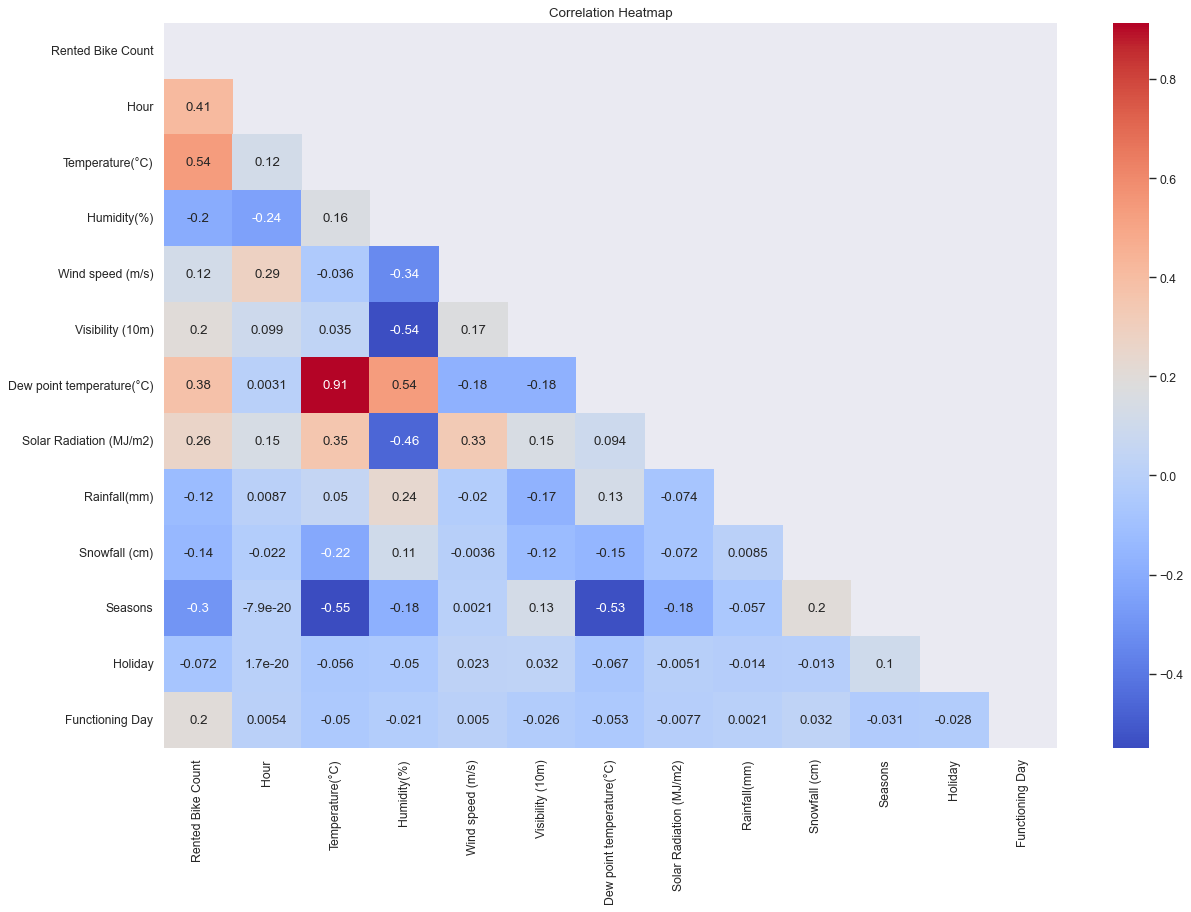

In [17]:
df_corr = df.corr()
mask = np.zeros_like(df_corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
plt.subplots(figsize=(18,12))
sns.heatmap(df_corr, cmap="coolwarm", annot=True, mask=mask)
plt.title("Correlation Heatmap");

- Do đặc thù đối tượng của chúng ta trong đồ án này là việc cho thuê xe nên nhìn vào heatmap ở cột 'Rented Bike Count' cũng có khá nhiều mối quan hệ đồng biến và nghịch biến. Cụ thể các cột có mối tương quan lớn nhất là  **Hour, Temperature, Dew point temperature, Seasons.** 
- Tiếp theo, ta sẽ vẽ biểu đồ từng cặp theo mối quan hệ như đã nói ở trên. Điều đặc biệt là ở cột các mùa chỉ có 4 mùa (Xuân, Hạ, Thu, Đông). Do đó mà ở đây ta sẽ dùng 4 mùa này để làm các nhãn trong biểu đồ các cặp.

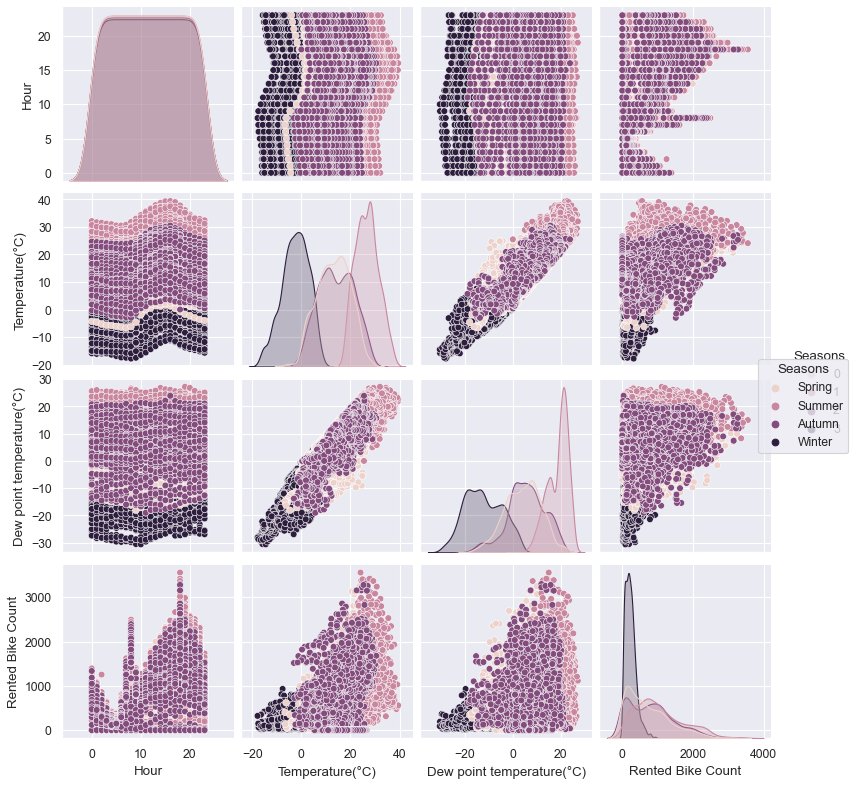

In [41]:
pair_df = df[['Hour', 'Temperature(°C)', 'Dew point temperature(°C)', 'Rented Bike Count', 'Seasons']]

g = sns.pairplot(pair_df, hue='Seasons', height=2.5)
handles = g._legend_data.values()
labels = ['Spring','Summer','Autumn','Winter']
g.fig.legend(handles=handles, labels=labels,title='Seasons',bbox_to_anchor=(1,0.55));

- Bới cột 'Rented Bike Count' thì có thể đưa ra một nhận xét mang tính chủ quan ở đây như sau: Ở các mùa lạnh (mùa đông) thì lượng xe cho thuê là rất thấp so với các mùa còn lại. Ngoài ra, ở 8-9h và 17-18h là 2 khoảng thời gian mà có lượng thuê xe tăng vọt lên so với các giờ trước đó (nhất là 17-18h).
- Giống như ở biểu đồ Heatmap các cột 'Dew point temperature(°C)' và cột 'Temperature(°C)' thì mang mối quan hệ đồng biến do đó ở 2 cột này cho ta một đồ thị rất đẹp ở chính giữa. 

- **Từ heatmap và pairplot ta có thể thấy giữa nhiệt độ thực (Temperature) và nhiệt độ điểm sương (Dew point temperature) có mối liên hệ rất lớn với nhau (0.91).** Điều đó là dễ hiểu vì nhiệt độ thực chính là yếu tố nền tảng tạo nên nhiệt độ điểm sương. <br>
- Sau 1 số thông tin nhóm em tìm hiểu được thì độ ẩm còn tỉ lệ với cả hiệu của nhiệt độ thực và nhiệt độ điểm sương. Ta có thể xem thêm bằng scatterplot sau: 

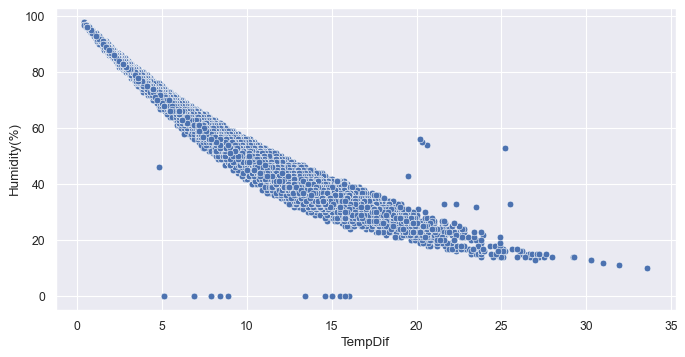

In [37]:
df['TempDif'] = df['Temperature(°C)'] - df['Dew point temperature(°C)']
sns.scatterplot(data = df,x= 'TempDif',y='Humidity(%)');

- Thật vậy, từ biểu đồ trên ta dễ dàng thấy được độ ẩm tỉ lệ nghịch với hiệu của nhiệt độ thực và nhiệt độ hóa sương. Tức là 2 mức nhiệt độ trên chênh lệch càng ít thì độ ẩm trong không khí càng cao. 
- Bên cạnh đó, ta cũng thử kiểm tra xem liệu thuộc tính hiệu nhiệt độ vừa tạo ở trên còn có mối tương quan nào với các thuộc tính còn lại hay không

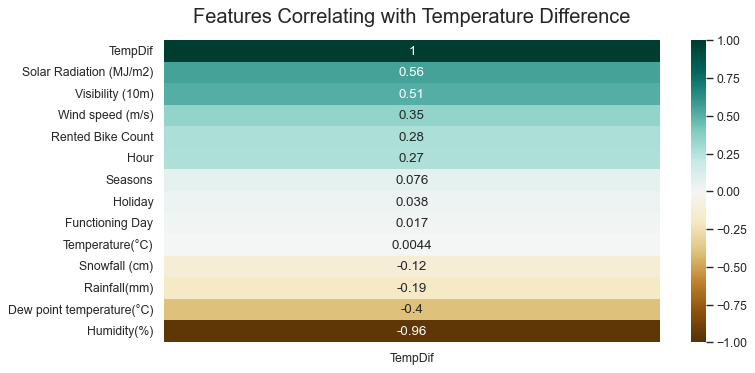

In [38]:
corrMatrix = df.corr()
plt.figure(figsize=(10, 5))
heatmap = sns.heatmap(corrMatrix[['TempDif']].sort_values(by='TempDif', ascending=False), 
                      vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Temperature Difference', fontdict={'fontsize':18}, pad=16);

- Một lần nữa ta được kiểm chứng rằng sự chênh lệch nhiệt độ tỉ lệ nghịch với % độ ẩm trong không khí (-0.96)
- Điều thú vị là sự chênh lệch này còn có mối tương quan với cả mức bức xạ mặt trời và tầm nhìn xa. Ta sẽ phân tích thêm ở phần đặt câu hỏi nếu có đủ thời gian

Ngoài ra, ta cũng kiểm tra xem liệu thông tin về thời tiết có vấn đề gì hay không: 
- **Tìm xem liệu tuyết có rơi vào mùa nào khác mùa đông**
- **Liệu vào mùa đông nhiệt độ có lúc nào cao từ 30°C trở lên hay không**
(Lưu ý, mùa đông đã được gán mã là "3")

In [39]:
df.loc[df.Seasons != 3].groupby('Date')['Snowfall (cm)'].mean().sort_values().tail(5)

Date
2018-06-01    0.000000
2018-11-30    0.000000
2018-11-26    0.120833
2018-11-25    1.725000
2018-11-24    3.279167
Name: Snowfall (cm), dtype: float64

- Ta thấy lượng tuyết trên dù không phải rơi vào mùa đông tuy nhiên cũng là những ngày cuối cùng của mùa thu trước khi chuyển mùa. Do đó cũng không có vấn đề gì, ta có thể xem những trận tuyết rơi này chính là tuyết đầu mùa

In [43]:
df.loc[df.Seasons == 3].groupby('Date')['Temperature(°C)'].mean().sort_values().tail(5)

Date
2018-01-17    4.550000
2018-01-15    4.708333
2018-02-28    4.850000
2017-12-03    4.875000
2017-12-23    6.129167
Name: Temperature(°C), dtype: float64

- Ta thấy nhiệt độ cao nhất vào mùa đông chỉ từ khoảng 4-6°C nên có thể tạm kết luận dữ liệu không có vấn đề gì và hoàn toàn phù hợp để phân tích
- Vậy là ở phần này ta đã khám phá sơ bộ qua tập dữ liệu ta sẽ làm việc. Để không đi quá xa và lấn vào các phần tìm hiểu bên dưới ta sẽ dừng phân tích ở đây và chuyển sang phần đặt câu hỏi. Hy vọng sẽ mang đến nhiều thú vị hơn ở phần sau!

# Đưa ra các câu hỏi có ý nghĩa cần trả lời

| Câu hỏi | Ý nghĩa |
| --- | --- |
|Khoảng thời gian xe đạp thường được dùng nhiều nhất và ít nhất? | Điều chỉnh lượng xe đạp cũng như các dịch vụ đi kèm để phù hợp với từng khoảng thời gian trong ngày. Ví dụ như vào giờ cao điểm thì tăng thêm các dịch vụ về sửa xe đạp hay lượng nhân viên hướng dẫn cách sử dụng. |
| Vào những ngày nghỉ lễ hay ngày cuối tuần thì lượng xe đạp như thế nào so với những ngày đi làm bình thường?| Biết được xu hướng người dân thích sử dụng xe đạp khi đi làm việc hay đi dạo, đi chơi |
| Lượng xe đạp theo từng mùa/ từng tháng có sự thay đổi như thế nào?  | Đưa ra các chiến lược thuê xe phù hợp cho từng thời điểm trong năm.Tăng cường nhân lực vào những mùa được nhiều người dùng |
| Ngày nay, thay vì độ ẩm thì người ta thường hay xét đến nhiệt độ hóa sương để xác định mức độ thoải mái của không khí ngoài trời đối với con người. Vậy nhiệt độ hóa sương có mối liên hệ gì tới nhiệt độ thực hay độ ẩm? Nó có ảnh hưởng gì tới lượng người đi xe đạp hay không | Hiểu thêm về nhiệt độ hóa sương. Ảnh hưởng của nó đến người dân khi đi xe đạp |
| Dựa vào độ ẩm, nhiệt độ và các thuộc tính về thời tiết. Ta có thể phân biệt được mùa mưa và mùa tuyết rơi (2 mùa gây cản trở cho việc di chuyển) ở seoul không? (mùa mưa: vào khoảng tầm tháng 5 cuối xuân đầu hè, mùa tuyết rơi vào khoảng cuối tháng 12 đến giữa tháng 3). | Dự đoán trước được thời tiết sắp tới là mùa mưa hay mùa tuyết mặc khác có thể dự đoán được trong ngày có mưa rơi hay tuyết rơi không? để đưa ra lượng xe cho thuê thích hợp |
| Qua các hiện tượng thời tiết cực đoan gây cản trở việc di chuyển như mùa đông (tuyết rơi), mùa hè(mưa rơi) hay các thuộc tính như (lượng mưa, lượng tuyết) thì có phải số lượng xe thuê sẽ ít hơn không? | Kiểm định giả thuyết nếu trời mưa hay tuyết thì người dân sẽ có xu hướng đi xe đạp ít hơn. |
| Một số mùa như mùa hè, nắng nóng gây gắt có thể khiến lượng bức xạ lên mức cảnh báo. Dựa vào lượng bức xạ ở đây chúng ta sẽ xem xét xem liệu có người thuê xe ở thời điểm này không và số lượng có cao không? |  Qua đó, cảnh báo người dân nếu có lượng bức xạ đó hay vào tháng đó giờ đó không nên thuê xe đạp |
| Ở một số mùa như mùa đông thì tầm nhìn xa bị hạn chế do sương, tuyết,.. vì vậy khi tầm nhìn xa hạn chế ở mức cảnh báo. Ta sẽ xem thử có người thuê xe vào thời điểm này hay không?| Đưa ra cảnh báo nguy hiểm phù hợp cho người dùng. An toàn là trên hết. |

# Tiền xử lý + phân tích dữ liệu để trả lời cho từng câu hỏi

## **Khoảng thời gian xe đạp thường được dùng nhiều nhất và ít nhất?**
-> Điều chỉnh lượng xe đạp cũng như các dịch vụ đi kèm để phù hợp với từng khoảng thời gian trong ngày. Ví dụ như vào giờ cao điểm thì tăng thêm các dịch vụ về sửa xe đạp hay lượng nhân viên hướng dẫn cách sử dụng.

**Các bước thực hiện:**
- Tạo thêm cột Weekday (ngày trong tuần) bằng hàm Categorical của Pandas để sắp xếp thứ tự các ngày trong tuần
- Tạo thêm các cột có giá trị nhị phân IsWeekend (kiểm tra ngày đó có phải cuối tuần), IsWorkingDay (kiểm tra có phải ngày làm việc)
- Tìm **5 khung giờ có lượng xe đạp cao nhất và thấp nhất**
- Vẽ line chart biểu diễn lượng xe đạp được thuê theo từng giờ 
- Tạo dataframe về lượng xe đạp trong các ngày người dân đi làm và không đi làm theo từng giờ sau đó vẽ line chart có 2 đường để **so sánh xu hướng đi xe đạp của người dân trong 2 loại ngà**y đó
- Cuối cùng, ta thử chia 1 ngày thành 5 giai đoạn: sáng sớm, buổi sáng, chiều, tối và khuya
    - Tạo cột Period là giai đoạn trong ngày dựa theo khung giờ thu thập dữ liệu.
    - Vẽ grouped bar chart biểu diễn lượng xe đạp theo từng giai đoạn trong ngày, mỗi giai đoạn sẽ có 7 hình chữ nhật tương ứng 7 ngày trong tuần. 
    - Từ biểu đồ trên, ta sẽ phần nào biết được **giai đoạn trong ngày mà người dân thường dùng xe đạp theo các ngày trong tuần**

---

- Tạo thêm cột **Weekday** (ngày trong tuần) bằng hàm Categorical của Pandas để sắp xếp thứ tự các ngày trong tuần từ thứ 2 đến chủ nhật <br>
- Tạo thêm các cột có giá trị nhị phân **IsWeekend** (kiểm tra ngày đó có phải cuối tuần), **IsWorkingDay** (kiểm tra có phải ngày làm việc). 1 ngày vừa không phải là cuối tuần vừa không phải là ngày lễ thì sẽ là 1 working day (ngày làm việc)

In [ ]:
df1 = df.copy()

days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
#Sử dụng hàm Categorical() để sắp xếp thứ tự các ngày trong tuần
df1['Weekday'] = pd.Categorical(df1['Date'].dt.day_name(),categories= ["Monday", "Tuesday","Wednesday", "Thursday",
                                                                       "Friday", "Saturday", "Sunday"],ordered=True)

#Cài đặt các giá trị cho cột IsWeekend
df1['IsWeekend'] = df1['Weekday'].apply(lambda x : 1 if x=='Saturday' or x=='Sunday' else 0 )

#Cài đặt các giá trị cho cột IsWorkingday
df1['IsWorkingDay'] = pd.Series(len(df1), index=df1.index)
df1['IsWorkingDay'] = 0 
# 1 ngày vừa không phải là cuối tuần vừa không phải là ngày lễ thì sẽ là 1 working day (ngày làm việc)
df1.loc[(df1.IsWeekend == 0) & (df1.Holiday == 0),'IsWorkingDay'] = 1 

df1[['Date','Holiday','Weekday','IsWeekend','IsWorkingDay']]

**Nhóm lượng xe đạp theo từng giờ và lấy ra 5 khung giờ có lượng xe đạp cao nhất và 5 khung giờ có lượng xe đạp thấp nhất**

In [ ]:
# Nhóm lượng xe đạp theo từng giờ
avg_rent_hrs = df1.groupby('Hour')['Rented Bike Count'].mean()
# 5 khung giờ có lượng xe đạp cao nhất
avg_rent_hrs.sort_values().tail(5).sort_index()

- Có thể thấy lượng xe đạp đạt số lượng cao nhất chủ yếu vào **buổi chiều tối (từ 17h trở đi)**

In [ ]:
# 5 khung giờ có lượng xe đạp thấp nhất
avg_rent_hrs.sort_values().head(5).sort_index()

- Ngược lại, xe đạp được dùng ít nhất vào lúc **sáng sớm từ 2-6h**

**Vẽ biểu đồ đường biểu diễn lượng xe đạp được thuê theo từng giờ**

In [ ]:
# Line chart biểu diễn lượng xe đạp được thuê theo từng giờ 
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize = (10,5))
sns.lineplot(x=avg_rent_hrs.index, y=avg_rent_hrs.values, data=avg_rent_hrs,
                 linewidth  = 2.5, markers=True,ax=ax)
ax.set_xticks(range(len(avg_rent_hrs)));

- Theo những gì nhóm em tìm hiểu được thì giờ cao điểm ở Hàn Quốc thường vào khoảng **8-9 giờ sáng và 6-7 giờ chiều (18-19h)**. Nhìn theo đồ thị trên, ta dễ dàng thấy đó cũng chính là 2 khoảng thời gian mà lượng xe đạp tăng nhanh đột ngột
- Ngoài ra từ khuya đến sáng sớm (23h - 5h) điều thú vị là vẫn có không ít người sử dụng xe đạp. Do đó có thể cân nhắc gắn thêm tấm phản quang để hỗ trợ tầm nhìn

- Lúc này ta sẽ đặt thêm một vấn đề khác là vào những ngày mà giờ cao điểm thay đổi, tức là những ngày cuối tuần hoặc ngày lễ khi mà người dân không phải đi làm thì lượng xe đạp sẽ thay đổi như thế nào theo từng khung giờ

**Tạo dataframe về lượng xe đạp trong các ngày người dân đi làm và không đi làm theo từng giờ sau đó vẽ line chart có 2 đường để so sánh xu hướng đi xe đạp của người dân trong 2 loại ngày đó**

In [ ]:
workingday_bike = df1.groupby(['Hour','IsWorkingDay'])['Rented Bike Count'].mean().unstack()
workingday_bike.T

In [ ]:
ax = workingday_bike.plot(kind='line',style='.-',linewidth=3)
ax.set_xticks(range(len(df1.Hour.unique()))) ;

- Theo như đồ thị trên thì đường màu đỏ biểu diễn lượng xe đạp theo từng giờ trong ngày nghỉ thì buổi sáng lượng xe đạp không còn tăng mạnh vì người dân không phải đi làm. 
- Lượng xe đạp chỉ tăng mạnh vào buổi xế chiều, tức là khoảng 15h - 18h và đạt đỉnh vào lúc 17h. Có thể thấy **vào những ngày cuối tuần cũng như ngày lễ thì người dân có xu hướng sử dụng xe đạp sớm hơn bình thường** có lẽ là để đi dạo, tập thể dục thay vì sử dụng xe đạp để đi làm như những ngày trong tuần

**Chia 1 ngày thành 5 giai đoạn để ta dễ so sánh giữa các buổi trong 1 ngày:**
- 4-7h: Sáng sớm
- 8-12h: Buổi sáng
- 13-16h: Buổi chiều
- 17 - 20h: Buổi tối
- 21- 3h hôm sau: Buổi khuya

In [ ]:
def hour_transformer(x):
    if x >=4 and x <=7:
        return "Early Morning"
    elif x>=8 and x<=12:
        return "Morning"
    elif x >= 13 and x <=17:
        return "Afternoon" 
    elif x >=18 and x <=21:
        return "Evening"
    elif x>=22 or x <=3:
        return "Night"

**Tạo cột Period là giai đoạn trong ngày dựa theo khung giờ thu thập dữ liệu. Sau đó vẽ thêm 1 line chart biểu diễn lượng xe đạp theo từng giai đoạn trong ngày, mỗi giai đoạn sẽ tương ứng với mỗi đường.**

In [ ]:
df_period = df1.copy()
df_period['Period'] = df_period['Hour'].apply(hour_transformer)
fig,ax = plt.subplots(figsize=(12,5),dpi=100)
sns.lineplot(data = df_period, x = 'Weekday', y = 'Rented Bike Count', hue = 'Period',ci=None,linewidth=4)
plt.title("Registrations by Period of day throughout a week")
ax.legend(bbox_to_anchor=(1.1, 1.05));

- Từ biểu đồ trên, ta dễ dàng thấy được thời gian sáng sớm từ 4 - 7h sáng luôn có số lượng xe đạp thấp nhất và buổi tối luôn có nhiều người sử dụng xe đạp nhất. Có lẽ những người này dùng xe đạp để về nhà sau khi tan ca, điều này phần nào được kiểm chứng khi vào 2 ngày cuối tuần thì lượng xe đạp được dùng trong khoảng thời gian này giảm rõ rệt
- Buổi sáng và buổi chiều của các ngày trong tuần có vẻ không có quá nhiều sự khác biệt tuy nhiên vào cuối tuần thì lượng xe đạp thay đổi khá nhiều. Như thông tin từ line plot phía trên thì lượng xe đạp vào buổi sáng giảm và lượng xe đạp vào buổi chiều tăng vọt, thậm chí cao hơn cả buổi tối. 
- Một điều đáng chú ý khác là lượng xe đạp vào **khuya thứ 7 là cao nhất so với cùng thời điểm các ngày khác trong tuần**. Có thể là vì sáng hôm sau không phải đi làm nên người dân tận dụng buổi khuya thứ 7 để ra ngoài vui chơi, tụ tập cùng bạn bè.

##  **Vào những ngày nghỉ lễ hay ngày cuối tuần thì lượng xe đạp như thế nào so với những ngày đi làm bình thường?**
-> Từ kết luận ở câu 1, ta sẽ phân tích kĩ hơn để biết được xu hướng người dân thích sử dụng xe đạp khi đi làm việc hay đi dạo, đi chơi

**Các bước thực hiện**
- Tạo dataframe bike_compare_df với cột Rented Bike Count cùng cột DayType là loại ngày trong 3 loại: ngày làm việc, ngày cuối tuần, ngày lễ. Nếu vừa là cuối tuần vừa là ngày lễ thì ta sẽ xếp ngày đó vào loại ngày lễ
- Tính **trung bình lượng xe đạp đối với mỗi loại ngày sau đó vẽ pie chart để so sánh lượng xe được thuê với nhau** từ đó trả lời câu hỏi đầu tiên. 
- Tuy nhiên, có thể câu trả lời vẫn chưa chính xác nên ta sẽ tiếp tục đi sâu vào từng ngày lễ để kiểm chứng bằng cách **vẽ bar chart biểu diễn lượng xe đạp được thuê vào từng ngày lễ.**

**Tạo dataframe bike_compare_df với cột Rented Bike Count cùng cột DayType là loại ngày trong 3 loại: ngày làm việc, ngày cuối tuần, ngày lễ. Nếu vừa là cuối tuần vừa là ngày lễ thì ta sẽ xếp ngày đó vào loại ngày lễ**

In [ ]:
bike_compare_df = df1.copy()
bike_compare_df['DayType'] = 'Working Day'
bike_compare_df.loc[(df1.IsWeekend == 1) & (df1.Holiday == 0),'DayType'] = "Weekend"
bike_compare_df.loc[(df1.Holiday == 1),'DayType'] = "Holiday"
bike_compare_df[['DayType','Rented Bike Count']]

**Tính trung bình lượng xe đạp đối với mỗi loại ngày sau đó vẽ pie chart để so sánh lượng xe được thuê với nhau từ đó trả lời câu hỏi đầu tiên.**

In [ ]:
mean_compare = bike_compare_df.groupby('DayType')['Rented Bike Count'].mean()
mean_compare.plot(kind='pie', autopct='%1.1f%%', startangle=90, shadow=False, 
                       labels=mean_compare.index, legend = True, fontsize=14,figsize=(8,5));

- Có thể thấy **phần lớn lượng xe đạp được sử dụng vào ngày làm việc cũng như cuối tuần. Còn vào những ngày lễ lượng xe ít hơn rõ rệt.** Điều này có thể giải thích bằng việc vào kì nghỉ lễ thì người dân thường ở nhà cùng gia đình hoặc đi chơi xa bằng những phương tiện hiện đại hơn như xe hơi, máy bay,.. thay vì sử dụng xe đạp. Tuy nhiên ta cần phải kiểm tra để xem giải thích trên đã đúng hay chưa <br>

**Như đã nói ở trên, vào các kì nghỉ lễ thì người dân có thể sẽ đi chơi xa. Vậy ta cùng xem lượng xe đạp vào các kì nghỉ lễ dài trong năm của Hàn Quốc đó là tết Nguyên đán từ 15-17/2 và ngày lễ Chuseok (tết Trung thu) từ 23-25/9**

In [ ]:
lunars = ['2018-02-15','2018-02-16','2018-02-17']
chuseoks = ['2018-09-23','2018-09-24','2018-09-25']
long_holiday = df1.loc[(df1.Date.isin(lunars)) | (df1.Date.isin(chuseoks))]
long_holiday.groupby(['Date']).mean()

**Tính lượng xe đạp trong từng ngày thuộc các kì nghỉ lễ dài sau đó vẽ horizontal bar chart**

In [ ]:
long_holiday_bikecount = long_holiday.groupby(['Date'])['Rented Bike Count'].mean()
ax = long_holiday_bikecount.plot(kind='barh')
ax.set_yticklabels(long_holiday_bikecount.index.format(), size=15)
plt.locator_params(axis='y', nbins=30)
plt.xlabel('Rented Bike Count');

- Có thể thấy **lượng xe đạp vào kì nghỉ trung thu không hề thấp** nên có lẽ ta phải đi sâu vào từng ngày lễ để kiểm tra xem lượng xe đạp chính xác là tăng hay giảm. Trước tiên, **lượng xe đạp trung bình trong suốt khoảng thời gian thu thập dữ liệu này là :**

In [ ]:
bikecount_mean = df1.groupby('Date')['Rented Bike Count'].mean().mean()
bikecount_mean

Lượng xe đạp trung bình được sử dụng tại Seoul trong suốt khoảng thời gian thu thập dữ liệu là **khoảng 705 xe/ngày**. Ta cùng xem lượng xe đạp vào những ngày lễ tại Hàn Quốc cao hay thấp hơn mức trung bình này. <br>
**Vẽ horizontal bar chart biểu diễn lượng xe đạp được thuê trong từng ngày lễ**

In [ ]:
temp = df1.loc[df1['Holiday'] == 1].groupby(['Date'])['Rented Bike Count'].mean()
ax = temp.plot(kind='barh',figsize= (15,8))
ax.set_yticklabels(temp.index.format(), size=20)
plt.locator_params(axis='y', nbins=30)
plt.axvline(bikecount_mean,ls='--');

- Từ biểu đồ trên, ngày lễ lượng xe đạp ít hơn rõ rệt không hẳn là do người dân đi chơi xa mà cũng **tùy vào những ngày lễ khác nhau**
- Ta có thể thấy vào những ngày lễ trong năm, lượng xe đạp vẫn ở mức trung bình, thậm chí là trên cả mức trung bình. Tuy nhiên, lượng xe đạp thấp có lẽ là vì vào Noel (24-25/12) tết Dương lịch (1/1) và tết Âm lịch (15-17/2) người dân có xu hướng quây quần bên gia đình hoặc có những chuyến du lịch xa nhà nên không sử dụng đến xe đạp.

## **Dựa vào độ ẩm, nhiệt độ và các thuộc tính về thời tiết. Ta có thể phân biệt được mùa mưa và mùa tuyết rơi (2 mùa gây cản trở cho việc di chuyển) ở seoul không? (mùa mưa: vào khoảng tầm tháng 5 cuối xuân đầu hè, mùa tuyết rơi vào khoảng cuối tháng 12 đến giữa tháng 3).** <br>
—> dự đoán trước được thời tiết sắp tới là mùa mưa hay mùa tuyết mặc khác có thể dự đoán được trong ngày có mưa rơi hay tuyết rơi không? để đưa ra lượng xe cho thuê thích hợp

- **Bước đầu tiên ta sẽ trích xuất 2 thuộc tính mà thông qua đó ta có thể nhận biết ngay trời mưa hay tuyết đang rơi đó là thuộc tính Rainfall (lượng mưa) và Snowfall (lượng tuyết rơi). Và thêm vào đó ta sẽ trích xuất cột Month từ cột Date của dữ liệu** <br>
 --> Dữ liệu sau khi lấy ra được lưu vào extreme_df

In [ ]:
extreme_df = df.copy()
extreme_df['Month'] = extreme_df['Date'].dt.month
extreme_df = extreme_df.drop(['Date'], axis=1)
extreme_df = extreme_df[['Month', 'Rainfall(mm)', 'Snowfall (cm)']]
extreme_df

- **Tiếp theo, đối với thuộc tính Rainfall. Ta thực hiện gom nhóm theo tháng, sau đó ta tính trung bình cho mỗi tháng (vì dữ liệu thu thập ở dạng mỗi ngày trong 1 tháng, nên ta cần tính trung bình để xem tháng đó trung bình có giá trị là bao nhiêu.).
Sau đó thực hiện vẽ đồ thị cho giá trị vừa tính ra được. <br>
Đối với thuộc tính Snowfall ta cũng làm tương tự** <br>
 --> Sau khi hoàn thành ta sẽ được đồ thị như bên dưới

In [ ]:
rain_info = extreme_df.groupby('Month')['Rainfall(mm)']
rain_info = rain_info.sum() / rain_info.size()
rain_info = rain_info.reset_index()

snow_info = extreme_df.groupby('Month')['Snowfall (cm)']
snow_info = snow_info.sum() / snow_info.size()
snow_info = snow_info.reset_index()

pd.merge(rain_info, snow_info, left_on='Month', right_on='Month',).set_index('Month').plot(kind='bar',stacked=True,rot=0);

Dựa vào biểu đồ trên ta có thể thấy một cách rõ ràng từng mùa: mùa mưa rơi vào tầm tháng 3 đến tháng 10 (lớn hơn chuẩn 0.098mm per hour theo wikipedia). Còn mùa tuyết rơi thì vào tầm khoảng tháng 11 đến hết tháng 2. **Đúng thật đây là đất nước lạnh "Hàn Quốc" : đất nước giá lạnh**

- **Ở đây chỉ là phần xem xét xem liệu có thể tách(phân nhóm) các tháng mưa và tuyết dựa trên các thuộc tính về thời tiết không. Mặc dù vậy kết quả cho ra ở đồ thị thì có vẻ như khó có thể phân lớp một cách chính xác cho từng tháng trong đồ thị này.**

In [ ]:
from sklearn.decomposition import PCA

rain_info_df = df.drop('Rented Bike Count',axis=1)
rain_info_df['Month'] = rain_info_df['Date'].dt.month
rain_info_df = rain_info_df.drop('Date', axis=1)

train_df = rain_info_df.drop('Month', axis=1)
target = rain_info_df['Month']

model = PCA(n_components=2)
model.fit(train_df)
info_2D =  model.transform(train_df)

rain_info_df['PCA1'] = info_2D[:, 0] 
rain_info_df['PCA2'] = info_2D[:, 1]

sns.lmplot(x = "PCA1",y = "PCA2", hue='Month', 
           data=rain_info_df.loc[rain_info_df['Month'].isin([3, 4, 5, 6, 7, 8, 9, 10])], fit_reg=False); 

sns.lmplot(x = "PCA1",y = "PCA2", hue='Month', 
           data=rain_info_df.loc[rain_info_df['Month'].isin([1, 2, 11, 12])], fit_reg=False); 

- **Dựa vào 2 biểu đồ trên, ta thấy được giữa mùa mưa và mùa tuyết có mối quan hệ với nhau nên 2 biểu đồ sẽ bị trùng lắp khá nhiều. Do đó việc phân lớp giữa mùa mưa và mùa tuyết rơi khá khó khăn... đối với phạm vi môn học này nên ta sẽ tạm ngừng phân tích tại đây.**

## **Qua các hiện tượng thời tiết cực đoan gây cản trở việc di chuyển như mùa đông (tuyết rơi), mùa hè(mưa rơi) hay các thuộc tính như (lượng mưa, lượng tuyết) thì có phải số lượng xe thuê sẽ ít hơn không?** <br>
—> Kiểm định giả thuyết nếu trời mưa hay tuyết thì người dân sẽ có xu hướng đi xe đạp ít hơn.

- **Theo như ở câu hỏi 3. Ta đã xác định được các tháng mưa nhiều và có tuyết rơi. Do đó ở đây để đơn giản hóa vấn đề ta sẽ sử dụng kết quả của câu 3 để trả lời câu hỏi này**. <br>
Cụ thể ta sẽ lấy các tháng: <br>
    - Mùa mưa (lượng mưa mỗi giờ >= 0.098) (theo như Wikipedia)
    - Mừa tuyết rơi: chỉ cần có tuyết rơi là được<br>
 --> Dữ liệu cuối cùng về các tháng được lưu vào biến extreme_weather_month

In [ ]:
rain_month = rain_info.loc[rain_info['Rainfall(mm)'] > 0.098, 'Month'].values
snow_month = snow_info.loc[snow_info['Snowfall (cm)'] != 0, 'Month'].values
extreme_weather_month = np.unique(np.append(rain_month, snow_month))
extreme_weather_month

- **Bước tiếp theo cũng khá giống ở câu hỏi 3. Ta sẽ lấy các thuộc tính liên quan như ['Month', 'Rented Bike Count'] trong các tháng mà ta vừa lấy ở bước trên. Sau đó tiếp tục gom nhóm theo tháng và tính trung bình cho các tháng.** <br>
Đối với các tháng thông thường(các tháng trừ tháng mưa và tuyết) ta cũng làm tương tự như trên. <br>
 --> Sau đó, ta thực hiện vẽ biểu đồ cho 2 trường hợp này để so sánh chúng với nhau.

In [ ]:
# adding month
df['Month'] = df['Date'].dt.month
# getting extreme month
extreme_rent = df.loc[df['Month'].isin(extreme_weather_month), ['Month', 'Rented Bike Count']]
extreme_info = extreme_rent.groupby('Month')['Rented Bike Count']
extreme_info = extreme_info.sum() / extreme_info.size()
extreme_info = extreme_info.reset_index()

plt.bar(extreme_info['Month'], extreme_info['Rented Bike Count'])
plt.xlabel('Month')

normal_rent = df.loc[~df['Month'].isin(extreme_weather_month), ['Month', 'Rented Bike Count']]
normal_info = normal_rent.groupby('Month')['Rented Bike Count']
normal_info = normal_info.sum() / normal_info.size()
normal_info = normal_info.reset_index()

plt.bar(normal_info['Month'], normal_info['Rented Bike Count'])
plt.legend(['Extreme', 'Normal']);
plt.xticks(np.arange(1,13));

- Nhìn vào biểu đồ thì ta cũng kết luận được giả thuyết các mùa có thời tiết khắc nghiệt thì sẽ có ít người thuê xe hơn là sai hoàn toàn trong trường hợp này. 
- Có lẽ do Hàn Quốc là một đất nước thời tiết khá khắc nghiệt đa số chỉ toàn là mùa đông và mùa mưa nên việc đi xe đạp cũng ảnh hưởng từ đó. Mặc dù mùa tuyết rơi có số lượng thuê xe ít nhất thì không phải bàn cãi (tuyết rơi gây ách tắc giao thông) nhưng trong mùa mưa việc thuê xe đạt đỉnh trong mùa này. Lý do đơn giản có thể là những ngày này thì chỉ mưa ở một thời điểm nào đó trong ngày (mưa ở chiều tối và đêm,...). Do đó, thời tiết ở các tháng này có thể sẽ rất đẹp nên việc đi xe đạp cũng thuận tiện hơn. Hoặc có một lí do khá thú vị nữa là có thể người ta thích đi xe đạp khi trời mưa :v

## **Lượng xe đạp theo từng mùa/ từng tháng có sự thay đổi như thế nào?**
-> Đưa ra các chiến lược thuê xe phù hợp cho từng thời điểm trong năm.Tăng cường nhân lực vào những mùa được nhiều người dùng

**Các bước thực hiện**
- Vẽ bar plot để **so sánh lượng xe đạp được thuê theo từng mùa** để xem ở mùa nào thì người dân dùng xe đạp nhiều nhất và ít nhất
- Vẽ 2 line plot với biểu đồ đầu có 4 đường tương ứng với **lượng xe đạp trong mỗi khung giờ trong 4 mùa** và biểu đồ thứ 2 là **lượng xe đạp ở mỗi giai đoạn trong ngày trong 4 mùa**. Từ đó biết được khung giờ có số lượng xe cho thuê cao nhất theo từng mùa
- Tạo cột Month là thông tin về tháng
- Vẽ một bar plot đơn giản biểu diễn **lượng xe đạp theo tháng (đã được đánh dấu theo từng mùa) để xem người dân thường sử dụng xe đạp nhiều vào khoảng tháng nào và mùa nào**
- Vẽ thêm một bar plot với độ cao biểu diễn lượng xe đạp và màu của mỗi hình chữ nhật đại diện cho nhiệt độ trung bình dựa trên thanh màu ở bên phải biểu đồ để **xem nhiệt độ khác nhau giữa các tháng làm ảnh hưởng đến lựa chọn đi xe đạp của người dân hay không**
- Tạo 1 dataframe với giá trị ở mỗi (i,j) là lượng xe đạp trung bình của của tháng i và ngày thứ j (ngày trong tuần). Sau đó vẽ 1 heatmap dựa trên dataframe vừa tạo để tìm hiểu **sự thay đổi về lượng xe đạp ở các ngày trong tuần khác nhau như thế nào theo mỗi tháng**

- **Thời gian về các mùa tại Hàn Quốc**
    - Mùa xuân (giữa tháng 3 đến cuối tháng 5)
    - Mùa hè (tháng 6 đến tháng 8)
    - Mùa thu (tháng 9 đến tháng 11)
    - Mùa đông (tháng 12 đến giữa tháng 3)

**Vẽ bar plot để so sánh lượng xe đạp được thuê theo từng mùa để xem ở mùa nào thì người dân dùng xe đạp nhiều nhất và ít nhất**

In [ ]:
sns.barplot(x='Seasons',y='Rented Bike Count', data=df1, palette='coolwarm');
plt.axhline(bikecount_mean,ls='--');

- Dễ thấy rằng **xe đạp được sử dụng nhiều nhất vào mùa hè.** Vào mùa xuân và mùa thu thì lượng xe đạp vẫn trên mức trung bình (>705 xe đạp). 
- Tuy nhiên **vào mùa đông, lượng xe đạp thấp rõ rệt (~200 xe đạp)**. Có lẽ là vì thời tiết lúc này khắc nghiệt, thậm chí có mưa lớn và tuyết rơi. Do đó để tăng tần suất sử dụng thì hệ thống xe đạp nên thêm các gói giảm giá, ưu đãi hoặc thêm áo mưa trên mỗi xe đạp. Ngoài ra có thể yêu cầu thành phố thường xuyên cào tuyết trên đường để thuận tiện cho việc sử dụng xe đạp để di chuyển

**Vẽ 2 biểu đồ với biểu đồ đầu có 4 đường tương ứng với lượng xe đạp trong mỗi khung giờ trong 4 mùa và biểu đồ thứ 2 là lượng xe đạp ở mỗi giai đoạn trong ngày trong 4 mùa.**

In [ ]:
sns.set(font_scale=2)
fig, ax = plt.subplots(nrows = 2, ncols = 1, figsize = (20,12),dpi=80)
sns.lineplot(data=df1, x="Hour", y="Rented Bike Count", hue="Seasons",ci=None,
             palette="flare",linewidth = 3, ax=ax[0])
ax[0].legend(['Spring','Summer','Autumn','Winter'])
ax[0].set_xticks(np.arange(0,24));

sns.barplot(data = df_period, x = 'Period', y = 'Rented Bike Count', hue = 'Seasons',
            ci=None,palette="flare",ax=ax[1])
ax[1].legend(['Spring','Summer','Autumn','Winter'])
plt.tight_layout()

- Có thể thấy lượng người đi xe đạp theo từng giờ từ mùa xuân đến mùa thu không thay đổi quá nhiều. Chúng đều có 2 khung giờ tăng mạnh là 7-8h và 17-18h. Đặc biệt, lượng xe đạp vào buổi tối và buổi khuya của mùa hè vượt trội hơn hẳn các mùa còn lại.
- Tuy nhiên vào mùa đông, **ở 2 khung giờ cao điểm lượng xe đạp dù vẫn tăng nhưng là không nhiều như các mùa khác**. Có thể là vì thời tiết lạnh nên người dân ngại sử dụng xe đạp để đi làm thay vào đó là sử dụng các phương tiện công cộng khác như xe bus, tàu điện ngầm,..

**Tạo thêm cột Month là thông tin về tháng**

In [ ]:
df1['Month'] = df1['Date'].dt.month
df1.head(3)

**Vẽ một bar plot đơn giản biểu diễn lượng xe đạp theo tháng (đã được đánh dấu theo từng mùa) để xem người dân thường sử dụng xe đạp nhiều vào khoảng tháng nào và mùa nào**

In [ ]:
monthly_bike = df1.groupby('Month')[['Seasons','Rented Bike Count']].mean()
monthly_bike.loc[monthly_bike['Seasons'] == 0, 'Seasons'] = 'Spring'
monthly_bike.loc[monthly_bike['Seasons'] == 1, 'Seasons'] = 'Summer'
monthly_bike.loc[monthly_bike['Seasons'] == 2, 'Seasons'] = 'Autumn'
monthly_bike.loc[monthly_bike['Seasons'] == 3, 'Seasons'] = 'Winter'

fig,ax = plt.subplots(1,1)
sns.barplot(data = monthly_bike,x=monthly_bike.index,y='Rented Bike Count',hue='Seasons',ax=ax);


- Biểu đồ trên giúp ta thấy rõ về phân bố lượng xe đạp theo từng tháng và từng mùa trong năm. Lượng xe đạp cao nhất được ghi nhận vào khoảng cuối xuân, đầu hạ (tháng 5 đến tháng 7) và thấp rõ rệt vào mùa đông. 
- Sau đây ta cùng xem có phải là do nhiệt độ khác nhau giữa các tháng làm ảnh hưởng đến lựa chọn đi xe đạp của người dân

**Vẽ thêm một bar plot với:** <br>
    - Độ cao mỗi thanh biểu diễn lượng xe đạp của mỗi tháng <br>
    - Màu sắc của mỗi thanh biểu diễn nhiệt độ trung bình của mỗi tháng <br>
**Ở bên phải bar plot, vẽ một thanh màu để minh họa cho các mức nhiệt độ** <br>
**Ta tạo thêm 1 gridspec hỗ trợ việc điều chỉnh vị trí của bar plot và thanh màu**

In [ ]:
import matplotlib as mpl
    #Lượng xe đạp trung bình mỗi tháng

by_month = df1.groupby(['Month'])['Rented Bike Count'].sum()
by_month = by_month.reset_index()

    #Thiết lập màu sắc của mỗi thanh của biểu đồ dựa trên nhiệt độ trung bình
temp_month = df1.groupby(['Month'])['Temperature(°C)'].mean()
# Chuẩn hóa min_max cho nhiệt độ của mỗi tháng
temp_month_a = 100*(temp_month - temp_month.min())/(temp_month.max() - temp_month.min())
col_pal = sns.color_palette("coolwarm", 101)
colors = []
for x in temp_month_a.round().values.astype(int).T:
    colors.append(col_pal[x])
#Tạo thanh màu
fig = plt.figure(figsize=(10, 5), facecolor='w', edgecolor='k')
gs = fig.add_gridspec(1, 23)

ax1 = fig.add_subplot(gs[0, :21])
ax2 = fig.add_subplot(gs[0, 22])
# Vẽ bar plot
sns.barplot(x='Month', y='Rented Bike Count', data=by_month, ax=ax1, palette=colors, edgecolor=(0,0,0),ci=None)
ax1.set_ylabel("Bike count")
# Vẽ thanh màu
cmap = mpl.cm.coolwarm
norm = mpl.colors.Normalize(vmin=temp_month.min(), vmax=temp_month.max())
cb1 = mpl.colorbar.ColorbarBase(ax=ax2, cmap=cmap,norm=norm,orientation='vertical')
cb1.set_label('Avg. temp.')

- Ta có thể thấy được người dân sẽ **sử dụng xe đạp nhiều nhất vào tháng 5-7 cũng là lúc nhiệt độ vừa phải, không quá nóng cũng không quá lạnh.**
- Vào tháng 8 nhiệt độ trung bình là cao nhất trong năm, điều đó đã ảnh hưởng phần nào đến lượng xe đạp. Dù đang là mùa hè và tháng 8 cũng là kì nghỉ của học sinh Hàn Quốc nhưng lượng xe thấp hơn hẳn các tháng lân cận.
- **Từ tháng 12 đến tháng 1, nhiệt độ Hàn Quốc rất thấp,** thậm chí có lúc dưới 0 độ nên ta có thể hiểu được tại sao người dân không dùng xe đạp nhiều như các khoảng thời gian khác trong năm

Cuối cùng ta tìm hiểu sự thay đổi về lượng xe đạp ở các ngày trong tuần khác nhau như thế nào theo từng tháng

**Tạo 1 dataframe với giá trị ở mỗi ô (i,j) là lượng xe đạp trung bình của tháng i và ngày thứ j (ngày trong tuần).**

In [ ]:
relate = df1.groupby(['Weekday','Month'])['Rented Bike Count'].mean().unstack()
relate

**Vẽ 1 heatmap dựa trên dataframe vừa tạo để tìm hiểu sự thay đổi về lượng xe đạp ở các ngày trong tuần khác nhau như thế nào theo mỗi tháng**

In [ ]:
sns.set(font_scale=1)
sns.heatmap(relate,annot=True, cmap='BrBG', fmt=".0f");

Qua heatmap ở trên, ta có thể một lần nữa khẳng định các kết luận đã đưa ra bên trên:
- Có thể thấy các **khu vực có màu xanh đậm nhất là vùng ở giữa tức là thứ 2 đến thứ 6 từ tháng 5 đến tầm tháng 9.** Điều đó cũng là dễ hiểu vì người dân thường có xu hướng ra ngoài nhiều hơn vào mùa hè và mùa thu.
- Đặc biệt lượng xe đạp thường lớn hơn vào những ngày làm việc vì lúc đó đường xá sẽ ít kẹt xe còn vào cuối tuần người dân thường ở nhà nghỉ ngơi, quây quần bên gia đình sau một tuần làm việc mệt mỏi
- Ngoài ra, vào cuối tuần của những tháng đầu mùa hè (tháng 5,6) lượng xe đạp vẫn khá cao vì lúc đó thời  tiết bắt đầu trở nên mát mẻ, dễ chịu, phù hợp để ra đường vào cuối tuần

## **Một số tháng có nắng nóng gây gắt có thể khiến lượng bức xạ lên mức cảnh báo. Dựa vào lượng bức xạ ở đây chúng ta sẽ xem xét xem liệu có người thuê xe ở thời điểm này không và số lượng có cao không?** <br>
—> Qua đó, cảnh báo người dân nếu có lượng bức xạ đó hay vào tháng đó giờ đó không nên thuê xe đạp

- Nhiệt độ trên 30 độ C
- Chỉ số bức xạ trên 3

- **Bước đầu tiên ta sẽ lấy ra các dòng dữ liệu mà có chỉ số bức xạ trên 3 và nhiệt độ trên 30 độ. Sau đó trích xuất các thuộc tính cần thiếu về tháng, giờ, và số lượng xe được thuê vào thời điểm đó.** <br>
 --> Sau đó ta lưu vào biến warning_days

In [ ]:
warning_days = df.loc[(df['Solar Radiation (MJ/m2)'] > 3) & (df['Temperature(°C)'] > 30), 
                      ['Date','Month', 'Hour', 'Rented Bike Count']]
warning_days

- **Bước tiếp theo, để cho đơn giản ta sẽ thực hiện khá giống như các câu trên ở các ngày có bức xạ cao. Đó là thực hiện gom nhóm theo tháng và tính trung bình cho mỗi tháng. Nhưng ở các ngày bình thường, do đặc thù của dữ liệu là lấy theo từng giờ trong 1 ngày (1 ngày có 24 tiếng tương đương 24 dòng dữ liệu). Do đó, ta sẽ lấy dữ liệu sao cho cùng 1 tháng nhưng giờ ở thời điểm đó sẽ loại trừ các giờ nguy hiểm để so sánh chúng với nhau.** <br>
 --> Cuối cùng ta chỉ việc vẽ 2 đồ thị này ra để đưa ra nhận định cho câu hỏi này.

In [ ]:
fig, axis = plt.subplots(1,2,figsize=(15,5))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

warning_info = warning_days.groupby('Month')['Rented Bike Count']
warning_info = warning_info.sum() / warning_info.size()
warning_info = warning_info.reset_index()
warning_info = warning_info.set_index('Month')
warning_info[['Rented Bike Count']].plot(kind='bar',ax = axis[0], fontsize=10, color='brown', ylim=[0, 1300], rot=0,
                                         title='Trung bình lượng xe đạp ở các giờ có bức xạ cao trong tháng')
warning_info = warning_info.reset_index()

normal_hours = df['Month'].isin(warning_days['Month']) & ~df['Hour'].isin(warning_days['Hour'])
normal_days = df.loc[normal_hours, ['Month', 'Rented Bike Count']]
normal_info = normal_days.groupby('Month')['Rented Bike Count']
normal_info = normal_info.sum() / normal_info.size()
normal_info = normal_info.reset_index()
normal_info = normal_info.set_index('Month')

normal_info[['Rented Bike Count']].plot(kind='bar',ax = axis[1], fontsize=10, rot=0,
                                        title='Trung bình lượng xe đạp ở các giờ có bức xạ bình thường trong tháng');

Ta có thể thấy rằng lượng người thuê xe vào những khung giờ có độ bức xạ cao thì có xu hướng thấp hơn so với các khung giờ còn lại. Một phần lí do có thể là do nắng nóng gay gắt ở thời điểm này cũng khiến cho người ta không muốn ra đường. Mặc dù vậy thì chênh lệch giữa 2 biểu đồ là không quá lớn. Do đó, tại những thời điểm mà có độ bức xạ cao, chúng ta nên cảnh báo cho người dân không nên ra đường để tránh gây hại cho cơ thể.

## **Ở một số mùa như mùa đông thì tầm nhìn xa bị hạn chế do sương, tuyết,.. vì vậy khi tầm nhìn xa hạn chế ở mức cảnh báo. Ta sẽ xem thử có người thuê xe vào thời điểm này hay không?** 
—> Đưa ra cảnh báo nguy hiểm phù hợp cho người dùng. An toàn là trên hết.

- Theo quy ước thì tầm nhìn xa dưới 50m được cảnh báo là nguy hiểm!

- **Việc đầu tiên ta cần làm đó chính là lấy ra các dòng dữ liệu sao cho tầm nhìn xa dưới 50m (Do dữ liệu tính 10m 1 lần nên khi thực hiện ta sẽ chia cho 10). Sau đó ta trích xuất các thuộc tính liên quan 'Rented Bike Count', 'Month', 'Visibility (10m)'** <br>
    --> Dữ liệu có thuộc tính về việc thuê xe được lưu vào visible_days và dữ liệu có thuộc tính tầm nhìn sẽ được lưu vào visible_level

In [ ]:
visible_level = df.loc[df['Visibility (10m)'] / 10 < 50, ['Visibility (10m)', 'Month']]
visible_hours = df.loc[df['Visibility (10m)'] / 10 < 50, ['Rented Bike Count', 'Month']]

- Bước tiếp theo ta sẽ thực hiện gom nhóm theo tháng và tính trung bình các thuộc tính theo từng tháng.
- Ta sẽ chuẩn hóa dữ liệu cho 2 thuộc tính về khoảng [0,1]
- Cuối cùng ta sẽ thực hiện kết 2 thuộc tính này với nhau để vẽ đồ thị lineplot(do 2 thuộc tính này liên tục theo từng tháng nên ta sẽ chọn đồ thị lineplot để dễ dàng so sánh).

In [ ]:
visible_level = visible_level.groupby('Month')['Visibility (10m)']
visible_level = visible_level.sum() / visible_level.size()
visible_level = (visible_level - visible_level.min()) / (visible_level.max() - visible_level.min())

visible_hours  = visible_hours.groupby('Month')['Rented Bike Count']
visible_hours  = visible_hours.sum() /visible_hours.size()
visible_hours  = (visible_hours - visible_hours.min()) / (visible_hours.max() - visible_hours.min())
visible_hours  = pd.merge(visible_hours, visible_level, left_on='Month', right_on='Month',)

g = sns.lineplot(data=visible_hours);
g.set(xlim = (0,12));
g.set_xticks(np.arange(1,13));

Dựa vào biểu đồ thì có lẽ ta nên cảnh báo ở các tháng mà lượng thuê xe đạt đỉnh như tháng 6, tháng 10. Các tháng có tầm nhìn xa thấp như tháng 5 tháng 8 và tháng 12. Những tháng này đều có tầm nhìn xa ở mức cảnh báo hoặc là lượng thuê xe vẫn rất đông. Do đó, để an toàn ta nên khuyến khích người dân không nên thuê xe đạp và chờ cho thời tiết khá hơn (sương tan, tuyết ngừng rơi, ...). 

## **Ngày nay, thay vì độ ẩm thì người ta thường hay xét đến nhiệt độ hóa sương để xác định mức độ thoải mái của không khí ngoài trời đối với con người. Vậy nhiệt độ hóa sương có ảnh hưởng gì tới lượng người đi xe đạp hay không.**
-> Hiểu thêm về nhiệt độ hóa sương. Ảnh hưởng của nó đến người dân khi đi xe đạp

**Các bước thực hiện:**
- Vẽ một heatmap biểu diễn mối tương quan của các thuộc tính nhiệt độ và độ ẩm với lượng xe đạp cho thuê để xem nhiệt độ hóa sương và độ ẩm, thuộc tính nào ảnh hưởng nhiều hơn đến lượng xe đạp
- Tạo một cột mới là DPType có 3 giá trị tương ứng với 3 vùng giá trị của nhiệt độ điểm sương, mỗi vùng sẽ mang lại một cảm giác khác nhau trong không khí như thoải mái, nóng ẩm và khô. Sau đó vẽ bar chart để biểu diễn lượng xe đạp với mỗi vùng giá trị
- Sau đó ta vẽ thêm biểu đồ line chart nữa để biểu diễn mối tương quan giữa độ ẩm và lượng xe đạp khi nhiệt độ hóa sương trên 20°C để xem có gì đặc biệt 

**Vẽ một heatmap biểu diễn mối tương quan của các thuộc tính về nhiệt độ và độ ẩm với lượng xe đạp cho thuê**

In [ ]:
corrMatrix = df1[['Dew point temperature(°C)','Humidity(%)','Rented Bike Count']].corr()
plt.figure(figsize=(5, 3))
heatmap = sns.heatmap(corrMatrix[['Rented Bike Count']].sort_values(by='Rented Bike Count', ascending=False), 
                      vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Rented Bike Count', fontdict={'fontsize':18}, pad=16);

- Theo như heatmap thì **nhiệt độ điểm sương có mối tương quan với lượng xe đạp lớn hơn độ ẩm** (0.38 so với -0.2)

Nhiệt độ điểm sương chia làm 3 mức:
- Mức trên 20 độ C: nóng ẩm, oi bức
- Mức từ 0 - 20 độ C: thời tiết khá thoải mái
- Mức dưới 0 độ C: thời tiết khô

**Tạo một cột mới là DPType có 3 giá trị "Comfortable", "Muggy" và "Dry" tương ứng với 3 vùng giá trị của nhiệt độ điểm sương, mỗi vùng sẽ mang lại một cảm giác khác nhau trong không khí như thoải mái, nóng ẩm và khô.** 

In [ ]:
dp_df = df1.copy()
dp_df['DPType'] = 'Comfortable'
dp_df.loc[df['Dew point temperature(°C)'] < 0 ,'DPType'] = "Dry"
dp_df.loc[df['Dew point temperature(°C)'] > 20 ,'DPType'] = "Muggy"
dp_df[['DPType','Rented Bike Count']]

**Vẽ bar chart để biểu diễn lượng xe đạp với mỗi vùng giá trị. Ta chú thích thêm lượng xe đạp chính xác ở trên mỗi thanh của bar chart**

In [ ]:
fig,ax = plt.subplots(figsize = (6,3))
sns.barplot(data=dp_df,x = 'DPType',y='Rented Bike Count',ci=None,ax=ax)
for p in ax.patches:                 
    ax.annotate(np.round(p.get_height(),decimals=2),(p.get_x()+p.get_width()/2., p.get_height()),
                ha='center',va='center', xytext=(0, 10),textcoords='offset points')

- **Người dân ít sử dụng xe đạp nhất khi không khí ngoài trời có vẻ khô. Ngược lại, có vẻ như không khí nóng ẩm, oi bức không ảnh hưởng nhiều lắm đến lựa chọn đi xe đạp của người dân** khi lượng xe đạp không chênh lệch nhiều so với lúc thời tiết thoải mái

- Tuy nhiên, ta còn phải xét xem trường hợp nhiệt độ hóa sương và cả độ ẩm đều cao. Lúc đó, không khí sẽ trở nên oi bức, ngột ngạt kéo theo lượng xe đạp cũng giảm xuống

**Vẽ thêm biểu đồ line chart nữa để biểu diễn mối tương quan giữa độ ẩm và lượng xe đạp khi nhiệt độ hóa sương trên 20°C để xem có gì đặc biệt**

In [ ]:
high_dp = df1.loc[(df['Dew point temperature(°C)'] > 20)][['Humidity(%)','Rented Bike Count']]
temp = high_dp.groupby((df1['Humidity(%)']//5)*5)['Rented Bike Count'].mean()
temp.plot(kind='line',figsize=(8,4))
plt.xticks(np.arange(min(temp.index), max(temp.index)+1, 5));
plt.title('Bike count when dew point > 20°C');

Từ đồ thị trên, ta dễ dàng thấy rằng **với nhiệt độ hóa sương hơn 20 độ C và độ ẩm hơn 75% thì lượng xe đạp giảm một cách rõ rệt.** Do đó, cần có trạm tiếp nước thường xuyên cho những người sử dụng xe đạp vào những ngày này.

# Nhìn lại quá trình làm đồ án

## Những khó khăn

**Duy**

- Trước khi chọn dữ liệu hiện tại, nhóm em đã chọn tập dữ liệu khác về các cuộc sóng thần và đã khám phá cũng như đưa ra cả những câu hỏi. Tuy nhiên trong quá trình tiền xử lý và phân tích vì dữ liệu cũ có quá nhiều dữ liệu bị thiếu khiến việc đưa ra câu trả lời không được khách quan, do đó nên phải chọn tập dữ liệu Seoul Bike Sharing
- Sử dụng git và github để quản lý phiên bản và merge các branch, sửa conflict khi merge.

**Huy**

- **Đầu tiên, khó khăn chúng em phải kể đến đó là việc chọn dữ liệu.** <br>
Đối với các nhóm khác thì không biết thế nào nhưng đối với nhóm em thì việc dữ liệu có quá nhiều thì cũng là vấn đề khá khó khăn. Khi mà không biết lựa chọn chủ đề và dữ liệu nào cho phù hợp. <br>
Mặc dù vậy, thì sau những lần căng thẳng trong việc chọn dữ liệu thì chúng em ban đầu đã chọn dữ liệu về Tsunami(dữ liệu về các cơn sóng thần). Tuy nhiên, sau khi đã thực hiện tới bước đặt câu hỏi thì chúng em mới nhận ra rằng dữ liệu mà chúng em lấy có quá nhiều dữ liệu thiếu, nếu bỏ qua các dữ liệu thiếu đó thì e rằng không đủ để trả lời câu hỏi. Do đó mà chúng em quyết định lấy dữ liệu mới là dữ liệu về việc cho thuê xe đạp này. 

- **Tiếp theo, là vấn đề về sử dụng Github.** <br>
Mặc dù là chúng em cũng đã và đang sử dụng github để làm đồ án và quản lí các source code khác. Nhưng đây có thể nói là lần đầu chúng em được làm việc nhóm trên Github. Đây quả là một thách thức khá lớn khi mà trình độ sử dụng git của chúng em còn ở mức cơ bản. Do đó, ở trên github thì chúng ta đã thực hiện một đống commit(>100), branch(>3) cũng như các phép merge(>10). 

- **Kế đến, là vấn đề tinh thần.** <br>
Kì học này (năm 3 kì 1) quả là một kì học phải nói là khá là nặng đối với chúng em. Phải nói đây là kì học nặng nhất trong các năm vừa qua. Cũng có thể lí do đó mà thời gian chúng em có không nhiều khi phải vừa thi vừa thực hiện đồ án này để có thể hoàn thành đúng hạn. Mặc dù vậy vì có thể chưa có tinh thần tốt nên nhiều lúc chúng em cảm thấp ngợp và mệt mỏi với kì học và mong muốn hoàn thành tốt các môn học.

## Học được gì hữu ích

**Duy**

- Cân nhắc kĩ khi lựa chọn dữ liệu để phân tích
- Thông thạo hơn về cách sử dụng git và github

**Huy**

- **Thứ nhất, các công cụ, thư viện, ...** <br>
Môn học này là một môn chuyên nghành rất là hay. Có thể cũng vì do chuyên nghành này có môn học này nên em đã cảm thấy thích hơn về "Khoa Học Dữ Liệu" vì nó giúp em cảm thấy có đường đi rõ ràng và một cơ sở vững chắc. Thông qua môn học này em đã củng cố được các kiến thức về các công cụ, thư viện,... gọi tắt là các tool và cách sử dụng cho sự nghiệp Khoa Học Dữ liệu sau này của chúng em!

- **Thứ hai, cách xử lí khi gặp vấn đề.** <br>
Phải nói rằng bản thân em là một người rất kém về việc xử lý khi gặp vấn đề. Mỗi khi có bug hay là gặp trục trặc về máy,... em đều có các hướng giải quyết không thông minh lắm và đôi khi còn ngu ngốc nữa. Nên em cảm thấy rất buồn về bản thân mình. Nhưng sau khi học môn học này, sau mỗi lần xem thầy demo cũng như là giải đáp thắc mắc(như là môi trường min_ds-env) thì em nhận thấy được cách xử lý vấn đề trước giờ của mình là không ổn. Và qua đó có cơ hội để cải thiện cho tương lai sau này. 

- **Thứ ba, làm việc nhóm.** <br>
Dù rằng qua các kì trước thì chúng em đã không lạ gì với việc làm việc nhóm. Nhưng đối với GitHub thì đây là lần đầu tiên đối với em. Do đó, thông qua đồ án này mà em có cơ hội để trải nghiệm và nhận ra sức mạnh của GitHub. Qua đó, có thể em sẽ tìm hiểu và chú tâm hơn về công cụ này cho tương lai trước mắt là tìm cơ hội thực tập ở học kì tới! 

## Nếu có thêm thời gian sẽ làm gì

- **Đầu tiên việc đầu tiên em sẽ làm là tìm hiểu thêm về học máy.** <br>
Nội dung đồ án của chúng em là dựa trên dữ liệu để dự đoán xem số lượng xe thuê trong một ngày là bao nhiêu. Với đầu vào một thông tin về thời tiết và ngày. Sau đó, ta sẽ đưa ra được dự đoán xem ngày đó ta cần chuẩn bị bao nhiêu xe đạp để đáp ứng như cầu. Cũng như thuận tiện cho việc bảo dưỡng và sửa chữa các xe bị hỏng hóc.

- **Tiếp đến chúng em sẽ tìm hiểu thêm về dữ liệu.** <br>
Mặc dù dữ liệu chúng em lựa chọn chỉ có một năm và 14 thuộc tính. Tuy nhiên để nói là hiểu hết về dữ liệu này thì chúng em không dám khẳng định do đó nếu có thêm thời gian việc chúng em cần làm là tìm hiểu và khám phá lại dữ liệu này. Bên cạnh đó thì có thể thu thập thêm dữ liệu các năm tiếp theo để thuận tiện hơn cho việc dự đoán cũng như là việc khám phá dữ liệu.

- **Thứ ba là tham khảo bài làm của các nhóm cũng như các tài nguyên khác.** <br>
Chúng em hiểu rằng mình là người mới trong lĩnh vực này. Do đó, việc học hỏi và tìm hiểu là việc hết sức cần thiết. Do đó, nếu có thời gian thì em sẽ tham khảo thêm bài làm của các bạn và các tài nguyên trên mạng hay sách vở khác để qua đó rút được kinh nghiệm cho mình và có thể hoàn thiện bài làm này được tốt hơn.


- **Thứ 4 là nghiên cứu thêm thư viện trực quan hóa dữ liệu Plotly, có thể giúp người xem tương tác với biểu đồ**

# Tài liệu tham khảo

- Một số thông tin về hệ thống chia sẻ xe đạp tai Seoul :https://www.tandfonline.com/doi/full/10.1080/22797254.2020.1725789 
- Lịch nghỉ lễ và thông tin về các ngày lễ tại Hàn Quốc vào năm 2018 https://en.wikipedia.org/wiki/Public_holidays_in_South_Korea 
- Liên hệ giữa độ ẩm, nhiệt độ hóa sương và nhiệt độ thực: http://tornado.sfsu.edu/geosciences/classes/m356/Dewpoint.htm 
- **Python for DataScience**
- **DataScience from scratch**
- **Bài thực hành môn Nhập Môn Khoa Học Dữ liệu**
- **Bài thực hành môn Lập Trình Cho Khoa Học Dữ liệu**